In [41]:
import pandas as pd
import joblib
import numpy as np
from konlpy.tag import Okt
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.preprocessing import LabelEncoder

In [59]:
import pandas as pd
import glob

target_path = r'data/008_머니투데이/*.csv'
file_list = glob.glob(target_path)

df_list = []

for file in file_list:
    # 인코딩 예외 처리하며 읽기
    try:
        data = pd.read_csv(file, encoding='utf-8-sig')
    except:
        data = pd.read_csv(file, encoding='cp949')
    
    # --- 컬럼 생성 및 동일 키워드 입력 ---
    data['category'] = '머니투데이' 
    
    df_list.append(data)

final_df = pd.concat(df_list, ignore_index=True)
final_df.to_csv("머니투데이.csv")

In [75]:
import pandas as pd
import glob

target_path = r'data/언론사/*.csv'
file_list = glob.glob(target_path)

df_list = []

for file in file_list:
    # 인코딩 예외 처리하며 읽기
    try:
        data = pd.read_csv(file, encoding='utf-8-sig')
    except:
        data = pd.read_csv(file, encoding='cp949')
    df_list.append(data)
df = pd.concat(df_list, ignore_index=True)

In [1]:
df[df['category'] != '헤럴드경제']

NameError: name 'df' is not defined

In [37]:
df = pd.read_pickle('data/통합 pkl 파일 (~21)/oids_20251201-20251221/oids_20251201-20251221.pkl')

In [38]:
df

,날짜,제목,본문,링크,OID
0,2025-12-01 00:01:00,"""살게 되면 소주나 한 잔""…침몰 어선 속 선장의 하직 인사[그해 오늘]","[이데일리 이로원 기자] 2014년 12월 1일, 사조산업 명태잡이 어선 ‘501오...",https://n.news.naver.com/mnews/article/018/000...,018
1,2025-12-01 00:06:00,[사설] 대미 투자로 기업들 해외 이탈하는데 법인세까지 올리나,[서울경제] 여야가 대기업 법인세율을 올리기로 가닥을 잡은 모양새다. 주요국들이 ...,https://n.news.naver.com/mnews/article/011/000...,011
2,2025-12-01 00:06:00,"[사설] 꼬일대로 꼬인 ‘지하철 무임승차’, 해결책 마련 서둘러야",[서울경제] 전국 지하철의 재정 손실이 눈덩이처럼 불어나고 있는 가운데 이에 대한...,https://n.news.naver.com/mnews/article/011/000...,011
3,2025-12-01 00:06:00,[사설] 이번엔 쿠팡 고객 정보 다 털려…‘AI시대 보안’이 불안하다,[서울경제] 국내 e커머스 1위 기업인 쿠팡에서 3370만 건에 달하는 대규모 개...,https://n.news.naver.com/mnews/article/011/000...,011
4,2025-12-01 00:31:00,"""피 같은 감귤 3톤이 몽땅 사라졌다""…수확철 앞둔 제주서 무슨 일이?",[서울경제] 감귤 수확 철을 맞은 제주에서 농산물 절도 범죄가 급증하고 있어 주의...,https://n.news.naver.com/mnews/article/011/000...,011
...,...,...,...,...,...
81567,2025-12-21 23:29:00,젤렌스키 “미국과 종전 논의 건설적… 유럽과는 추가 협의 필요”,블로디미르 젤렌스키 우크라이나 대통령은 미국 플로리다에서 열린 미국과의 종전 협상을...,https://n.news.naver.com/mnews/article/366/000...,366
81568,2025-12-21 23:30:00,"소나무 범퍼·옥수수 시트, 이 정도 돼야 진짜 친환경차…신소재 경쟁 막 올랐다","플라스틱 규제에 ‘식물 신소재’ 연구 EU, 플라스틱 사용 제한 기업들 신소재 상용...",https://n.news.naver.com/mnews/article/009/000...,009
81569,2025-12-21 23:34:00,"이재명 대통령 ""대한민국, 배드민턴 새 역사…이보다 더 자랑스러울 수 없어""","이재명 대통령이 ""2025년은 '대한민국 배드민턴의 해'라 해도 과언이 아닐 것""이...",https://n.news.naver.com/mnews/article/008/000...,008
81570,2025-12-21 23:51:00,"李대통령 ""안세영 우승 더해 새 역사…항저우서 애국가 세 번 울렸다""","[파이낸셜뉴스] 이재명 대통령이 21일 사회관계망서비스(SNS) 메시지를 통해 ""오...",https://n.news.naver.com/mnews/article/014/000...,014


In [39]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 1. 저장된 경로 설정
model_path = "./my_kobert_model"

# 2. 장치 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 3. 모델 및 토크나이저 불러오기
model = AutoModelForSequenceClassification.from_pretrained(model_path).to(device)
tokenizer = AutoTokenizer.from_pretrained(model_path)

# 4. 라벨 인코딩
le = LabelEncoder()
le.classes_ = np.load('classes.npy', allow_pickle=True)

print("모델 로드")

모델 로드


In [40]:
import pandas as pd
from tqdm.auto import tqdm

def predict_industry_to_df(df, text_column='본문', batch_size=32, threshold=0.7):
    model.eval()
    
    # 1. 텍스트 추출 및 전처리 (결측값 대비)
    texts = df[text_column].fillna("").astype(str).tolist()
    
    all_labels = []
    all_probs = []
    
    print(f"분류 시작: 총 {len(texts)}개의 기사를 분석합니다.")
    
    # 2. 최적화를 위한 배치 추론
    with torch.inference_mode():
        for i in tqdm(range(0, len(texts), batch_size)):
            batch_texts = texts[i:i+batch_size]
            
            # 토크나이징 및 GPU 전송
            inputs = tokenizer(
                batch_texts, 
                return_tensors="pt", 
                truncation=True, 
                padding="longest", #True를 쓰면 256, longest = 해당 배치 내 가장 긴 문장 
                max_length=256
            ).to(device)
            
            # 모델 예측
            outputs = model(**inputs)
            probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
            max_probs, idxs = torch.max(probs, dim=1)
            
            # 결과 해석 및 임계값 적용
            for prob, idx in zip(max_probs.cpu().numpy(), idxs.cpu().numpy()):
                label_name = le.inverse_transform([idx])[0]
                
                # 확신도가 낮으면 '분류 불가' 처리
                if prob < threshold:
                    all_labels.append(f"분류 불가({prob:.2f})")
                else:
                    all_labels.append(label_name)
                all_probs.append(float(prob))
                
    # 3. 데이터프레임에 새로운 컬럼 추가
    df['산업'] = all_labels
    df['확신도'] = all_probs
    
    return df

# --- 실행 ---
# 데이터프레임에 적용
test = predict_industry_to_df(df)

# 결과 확인
print("\n 완료 --- 결과 ---")
print(test[['제목', '산업', '확신도']].head(10))

# 특정 산업(예: 건설)이 어떻게 분류되었는지 확인해보기
print("\n--- '건설'로 분류된 기사 샘플 ---")
print(test[test['산업'] == '건설'][['제목', '확신도']].head())
print("\n--- '자동차'로 분류된 기사 샘플 ---")
print(test[test['산업'] == '자동차'][['제목', '확신도']].head())
print("\n--- '헬스케어'로 분류된 기사 샘플 ---")
print(test[test['산업'] == '헬스케어'][['제목', '확신도']].head())

분류 시작: 총 81572개의 기사를 분석합니다.


  0%|          | 0/2550 [00:00<?, ?it/s]


 완료 --- 결과 ---
                                         제목    산업       확신도
0  "살게 되면 소주나 한 잔"…침몰 어선 속 선장의 하직 인사[그해 오늘]  해당없음  0.971081
1        [사설] 대미 투자로 기업들 해외 이탈하는데 법인세까지 올리나  해당없음  0.981507
2      [사설] 꼬일대로 꼬인 ‘지하철 무임승차’, 해결책 마련 서둘러야  해당없음  0.975605
3    [사설] 이번엔 쿠팡 고객 정보 다 털려…‘AI시대 보안’이 불안하다  해당없음  0.979463
4   "피 같은 감귤 3톤이 몽땅 사라졌다"…수확철 앞둔 제주서 무슨 일이?  해당없음  0.973866
5                       [한경에세이] 명곡의 놀라운 생명력  해당없음  0.983845
6             [기고] 공교육의 새 기준 만들 '기초학력 전문교사'  해당없음  0.983570
7                      [다산칼럼] 혁신 옥죄는 규제 그물망  해당없음  0.729145
8                     [시론] '水 패권' 경쟁장 된 메콩강  해당없음  0.975953
9        [사설] 홍콩 ELS 과징금 2조…과잉 처벌의 부작용 경계해야  해당없음  0.977743

--- '건설'로 분류된 기사 샘플 ---
                                              제목       확신도
26            이어지는 건설업 규제·처벌 강화…"사후 규제영향평가 도입해야"  0.776262
112   "친환경은 물론 층간소음도 제로…모듈러 건축, 학교·빌딩·아파트도 가능하죠"  0.740330
114  "해외 누비는 건설사, 경제 '국가대표'…그들 돕는 '국가대표' 로펌 될 것"  0.842645
162              줄도산 위기 아니었나?… 잇달아 회생절차 졸업하는 건설사  0.796976
245 

### 산업별 기사 분류 현황 ###
자동차     3928
헬스케어    3659
건설      1957
Name: 산업, dtype: int64
------------------------------
전체 기사 수: 9544개


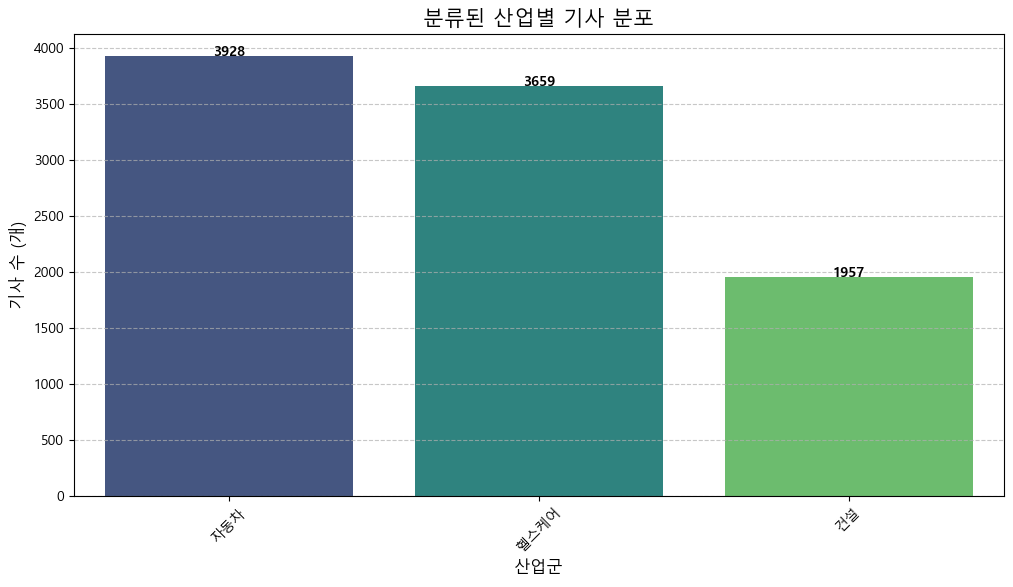

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (윈도우 환경)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. 산업별 기사 개수 집계 (value_counts)
industry_counts = test['산업'].value_counts()

print("### 산업별 기사 분류 현황 ###")
print(industry_counts)
print("-" * 30)
print(f"전체 기사 수: {len(test)}개")

# 2. 시각화 (막대 그래프)
plt.figure(figsize=(12, 6))
sns.barplot(x=industry_counts.index, y=industry_counts.values, palette='viridis')

plt.title('분류된 산업별 기사 분포', fontsize=15)
plt.xlabel('산업군', fontsize=12)
plt.ylabel('기사 수 (개)', fontsize=12)

# 막대 위에 숫자 표시
for i, v in enumerate(industry_counts.values):
    plt.text(i, v + 0.5, str(v), ha='center', fontweight='bold')

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [11]:
test[test['산업']=='헬스케어']

,날짜,제목,본문,링크,OID,산업,확신도
35,2025-12-01 04:09:00,"'닥터나우 방지법' 처리 임박… 벤처업계 ""혁신 족쇄"" 호소",일명 '닥터나우 방지법'(약사법 개정안)이 12월2일 국회 본회의에서 처리될 전망이...,https://n.news.naver.com/mnews/article/008/000...,008,헬스케어,0.784428
64,2025-12-01 05:01:00,"[백상논단] 생명공학기술, 철저한 검증과 관리 필요하다",[서울경제] 자기 자손은 유전적으로 완벽해 건강하게 장수하기를 바라는 마음은 모든...,https://n.news.naver.com/mnews/article/011/000...,011,헬스케어,0.768045
141,2025-12-01 06:01:00,12월 첫째 주 IPO 대전…車보안·AI·조선·바이오 한꺼번에 쏟아진다 [이번주 증...,[서울경제] 12월 첫째 주(1~5일) 기업공개(IPO) 시장에서는 티엠씨(유가증...,https://n.news.naver.com/mnews/article/011/000...,011,헬스케어,0.818297
167,2025-12-01 06:02:00,"[사이언스샷] 꿈의 CAR-T 항암제, 자가면역 질환도 잡는다","美FDA, 2017년부터 혈액암 대상 7종 허가 면역과잉이 부른 자가면역 질환도 공...",https://n.news.naver.com/mnews/article/366/000...,366,헬스케어,0.913915
231,2025-12-01 07:00:00,"바이젠셀, '항암신약 기대감' 시총 1200억 돌파…""플랫폼 가치 입증""",바이젠셀이 핵심 신약 파이프라인의 임상 2상에서 효능을 확인하면서 최근 주가가 급등...,https://n.news.naver.com/mnews/article/008/000...,008,헬스케어,0.916467
...,...,...,...,...,...,...,...
81300,2025-12-21 18:25:00,'신약개발 완주 경험' 적은 K제약… 정부 주도 지원책 절실,연간 기술수출 규모가 사상 처음으로 20조원을 돌파하며 한국 바이오 기업들의 기술력...,https://n.news.naver.com/mnews/article/014/000...,014,헬스케어,0.919030
81310,2025-12-21 18:27:00,"삼진식품·리브스메드, 코스닥시장 입성",시가총액이 1조원대에 달하는 바이오 최대어 리브스메드와 국내 대표 어묵 브랜드 삼진...,https://n.news.naver.com/mnews/article/015/000...,015,헬스케어,0.855863
81432,2025-12-21 19:08:00,[AI헬스케어] 정부 주도 AI의료 기술 개발...닥터앤서3.0 참여 기업은,[이데일리 김승권 기자] 정부 주도 의료 인공지능(AI) 사업 ‘닥터앤서’가 3.0...,https://n.news.naver.com/mnews/article/018/000...,018,헬스케어,0.723368
81495,2025-12-21 20:52:00,살 뺄 때만 먹는 줄 알았는데…알고보니 '완전식품'인 고구마의 놀라운 효능 [건강UP],[서울경제] 몸·마음·생활… 무분별한 정보는 많고 건강해야 할 곳도 많습니다. ...,https://n.news.naver.com/mnews/article/011/000...,011,헬스케어,0.856230


In [12]:
test[test['산업']=='건설']

,날짜,제목,본문,링크,OID,산업,확신도
26,2025-12-01 04:00:00,"이어지는 건설업 규제·처벌 강화…""사후 규제영향평가 도입해야""",최근 국회에서 규제와 처벌 강화를 골자로 하는 건설산업 관련 법안을 대거 입법하는 ...,https://n.news.naver.com/mnews/article/008/000...,008,건설,0.776262
112,2025-12-01 05:46:00,"""친환경은 물론 층간소음도 제로…모듈러 건축, 학교·빌딩·아파트도 가능하죠""",혁신은 위기 속에서 피어난다. 치열한 시장 경쟁과 불확실한 글로벌 경제 환경 속에서...,https://n.news.naver.com/mnews/article/018/000...,018,건설,0.740330
114,2025-12-01 05:47:00,"""해외 누비는 건설사, 경제 '국가대표'…그들 돕는 '국가대표' 로펌 될 것""","""해외에서 큰 프로젝트를 수주하는 건설사들은 우리나라 경제를 이끄는 '국가대표'잖아...",https://n.news.naver.com/mnews/article/008/000...,008,건설,0.842645
162,2025-12-01 06:01:00,줄도산 위기 아니었나?… 잇달아 회생절차 졸업하는 건설사,"올해만 건설사 9곳 법정관리 신청했지만 대우산업개발, 올해 첫 회생절차 종결 신동아...",https://n.news.naver.com/mnews/article/366/000...,366,건설,0.796976
245,2025-12-01 07:01:00,‘두산위브더제니스 센트럴 천안’ 1202가구 분양,두산건설은 ‘두산위브더제니스 센트럴 천안’ 견본주택을 개관하고 본격 분양에 나선다고...,https://n.news.naver.com/mnews/article/015/000...,015,건설,0.830692
...,...,...,...,...,...,...,...
81109,2025-12-21 17:41:00,"SK에코플랜트, 3년 연속 공정위 CP AAA등급 획득",[서울경제] SK에코플랜트가 공정거래위원회의 자율준수 프로그램(CP) 등급 평가에...,https://n.news.naver.com/mnews/article/011/000...,011,건설,0.799122
81265,2025-12-21 18:18:00,'한화포레나 부산 대연' 등 3개 단지서 총 1406가구 분양[분양캘린더],[서울경제] 12월 넷째 주에는 전국 3개 단지에서 총 1406가구(일반분양 11...,https://n.news.naver.com/mnews/article/011/000...,011,건설,0.757950
81314,2025-12-21 18:29:00,"GS건설, 올 도시정비 수주 6兆 돌파… ‘자이’ 브랜드 기술력 통했다",GS건설이 총 공사비는 9278억원 규모의 성북1구역 공공재개발 사업을 따내며 올해...,https://n.news.naver.com/mnews/article/014/000...,014,건설,0.855260
81316,2025-12-21 18:29:00,3200명 정신없는 건설현장… AI·통합관제로 안전 지킨다[현장르포],지난 19일 찾은 서울 서초구 디에이치 클래스트(반포주공1단지 1·2·4주구 재건축...,https://n.news.naver.com/mnews/article/014/000...,014,건설,0.846087


In [13]:
test[test['산업']=='자동차']

,날짜,제목,본문,링크,OID,산업,확신도
33,2025-12-01 04:06:00,유럽 흐르는 제네시스 마그마… 고성능 브랜드로 뜨겁게 경쟁,출범 10년을 맞은 제네시스가 '마그마'를 앞세워 유럽시장 공략에 나선다. 고성능 ...,https://n.news.naver.com/mnews/article/008/000...,008,자동차,0.980203
85,2025-12-01 05:29:00,5년 만에 10배 ‘폭풍성장’ 테슬라...“수입차 점유율 사상 첫 20% 돌파 전망”,[파이낸셜뉴스] 테슬라의 누적 판매 대수가 5년 만에 10배 가까이 늘어나는 등 국...,https://n.news.naver.com/mnews/article/014/000...,014,자동차,0.980213
169,2025-12-01 06:03:00,K치킨의 오래된 미래…젠슨 황이 두번 찾은 '홀매장'[생생확대경],[이데일리 노희준 기자] 젠슨 황 엔비디아 최고경영자(CEO)가 깐부치킨을 찾은 지...,https://n.news.naver.com/mnews/article/018/000...,018,자동차,0.911989
185,2025-12-01 06:16:00,"현대모비스, 해외 직원도 참여해 'CSR 이행' 앞장",[서울경제] 현대모비스(012330)가 ‘지속가능한 미래를 만들어가는 아름다운 동...,https://n.news.naver.com/mnews/article/011/000...,011,자동차,0.970327
200,2025-12-01 06:30:00,"더욱 큰 체격, 풍족한 매력의 렉서스 - 렉서스 LX 700h[별별시승]","[서울경제] 지난 3월, 한국토요타자동차는 국내 자동차 시장에 ‘럭셔리 플래그십 S...",https://n.news.naver.com/mnews/article/011/000...,011,자동차,0.981743
...,...,...,...,...,...,...,...
81228,2025-12-21 18:09:00,연말 車 판매 부진에… 개소세 인하 연장 요구 확산,개별소비세 인하 종료를 앞두고 있지만 정작 연말에도 국내 자동차 판매 추세가 좀체 ...,https://n.news.naver.com/mnews/article/014/000...,014,자동차,0.980085
81261,2025-12-21 18:16:00,"넥쏘 돌풍 타고…현대차, 수소경제 속도낸다",현대자동차가 7년 만에 내놓은 신형 수소전기차 ‘디 올 뉴 넥쏘’를 앞세워 글로벌 ...,https://n.news.naver.com/mnews/article/015/000...,015,자동차,0.982351
81291,2025-12-21 18:23:00,이젠 도보 안내도 '티맵' …지도서비스 싹 바뀐다,티맵이 내년 상반기 중 지도 서비스를 전면 개편한다. 기존 주력인 운전자 중심 내비...,https://n.news.naver.com/mnews/article/014/000...,014,자동차,0.959018
81298,2025-12-21 18:25:00,"현대L&C DIY 바닥재, 독일판 이케아 매장 입점",현대백화점그룹 계열 건자재 기업 현대L&C는 DIY 바닥재 '쉬움'이 독일 대표 홈...,https://n.news.naver.com/mnews/article/014/000...,014,자동차,0.858943


In [15]:
test[test['산업']=='해당없음']

,날짜,제목,본문,링크,OID,산업,확신도
0,2025-12-01 00:01:00,"""살게 되면 소주나 한 잔""…침몰 어선 속 선장의 하직 인사[그해 오늘]","[이데일리 이로원 기자] 2014년 12월 1일, 사조산업 명태잡이 어선 ‘501오...",https://n.news.naver.com/mnews/article/018/000...,018,해당없음,0.971081
1,2025-12-01 00:06:00,[사설] 대미 투자로 기업들 해외 이탈하는데 법인세까지 올리나,[서울경제] 여야가 대기업 법인세율을 올리기로 가닥을 잡은 모양새다. 주요국들이 ...,https://n.news.naver.com/mnews/article/011/000...,011,해당없음,0.981507
2,2025-12-01 00:06:00,"[사설] 꼬일대로 꼬인 ‘지하철 무임승차’, 해결책 마련 서둘러야",[서울경제] 전국 지하철의 재정 손실이 눈덩이처럼 불어나고 있는 가운데 이에 대한...,https://n.news.naver.com/mnews/article/011/000...,011,해당없음,0.975605
3,2025-12-01 00:06:00,[사설] 이번엔 쿠팡 고객 정보 다 털려…‘AI시대 보안’이 불안하다,[서울경제] 국내 e커머스 1위 기업인 쿠팡에서 3370만 건에 달하는 대규모 개...,https://n.news.naver.com/mnews/article/011/000...,011,해당없음,0.979463
4,2025-12-01 00:31:00,"""피 같은 감귤 3톤이 몽땅 사라졌다""…수확철 앞둔 제주서 무슨 일이?",[서울경제] 감귤 수확 철을 맞은 제주에서 농산물 절도 범죄가 급증하고 있어 주의...,https://n.news.naver.com/mnews/article/011/000...,011,해당없음,0.973866
...,...,...,...,...,...,...,...
81566,2025-12-21 23:26:00,"""앞으로 회사 나오지 말래요""…억대 연봉 받다가도 잘리는 이유가",[서울경제] 인공지능(AI) 확산이 노동시장에 구조적 실업을 늘리는 등 부정적 영...,https://n.news.naver.com/mnews/article/011/000...,011,해당없음,0.985115
81567,2025-12-21 23:29:00,젤렌스키 “미국과 종전 논의 건설적… 유럽과는 추가 협의 필요”,블로디미르 젤렌스키 우크라이나 대통령은 미국 플로리다에서 열린 미국과의 종전 협상을...,https://n.news.naver.com/mnews/article/366/000...,366,해당없음,0.982061
81569,2025-12-21 23:34:00,"이재명 대통령 ""대한민국, 배드민턴 새 역사…이보다 더 자랑스러울 수 없어""","이재명 대통령이 ""2025년은 '대한민국 배드민턴의 해'라 해도 과언이 아닐 것""이...",https://n.news.naver.com/mnews/article/008/000...,008,해당없음,0.968059
81570,2025-12-21 23:51:00,"李대통령 ""안세영 우승 더해 새 역사…항저우서 애국가 세 번 울렸다""","[파이낸셜뉴스] 이재명 대통령이 21일 사회관계망서비스(SNS) 메시지를 통해 ""오...",https://n.news.naver.com/mnews/article/014/000...,014,해당없음,0.968646


In [43]:
test = test.drop(columns = "OID")
test = test.drop(columns = "확신도")
test = test[test['산업'].isin(['자동차', '헬스케어', '건설'])]

In [49]:
test.to_pickle('industry_labeled.pickle')

In [2]:
import pandas as pd
pd.read_pickle('industry_labeled.pickle')

,날짜,제목,본문,링크,산업
26,2025-12-01 04:00:00,"이어지는 건설업 규제·처벌 강화…""사후 규제영향평가 도입해야""",최근 국회에서 규제와 처벌 강화를 골자로 하는 건설산업 관련 법안을 대거 입법하는 ...,https://n.news.naver.com/mnews/article/008/000...,건설
33,2025-12-01 04:06:00,유럽 흐르는 제네시스 마그마… 고성능 브랜드로 뜨겁게 경쟁,출범 10년을 맞은 제네시스가 '마그마'를 앞세워 유럽시장 공략에 나선다. 고성능 ...,https://n.news.naver.com/mnews/article/008/000...,자동차
35,2025-12-01 04:09:00,"'닥터나우 방지법' 처리 임박… 벤처업계 ""혁신 족쇄"" 호소",일명 '닥터나우 방지법'(약사법 개정안)이 12월2일 국회 본회의에서 처리될 전망이...,https://n.news.naver.com/mnews/article/008/000...,헬스케어
64,2025-12-01 05:01:00,"[백상논단] 생명공학기술, 철저한 검증과 관리 필요하다",[서울경제] 자기 자손은 유전적으로 완벽해 건강하게 장수하기를 바라는 마음은 모든...,https://n.news.naver.com/mnews/article/011/000...,헬스케어
85,2025-12-01 05:29:00,5년 만에 10배 ‘폭풍성장’ 테슬라...“수입차 점유율 사상 첫 20% 돌파 전망”,[파이낸셜뉴스] 테슬라의 누적 판매 대수가 5년 만에 10배 가까이 늘어나는 등 국...,https://n.news.naver.com/mnews/article/014/000...,자동차
...,...,...,...,...,...
81317,2025-12-21 18:29:00,압구정4구역 재건축 분양가 '국평 35억8천만원'... 290㎡ 펜트하우스는 211억,서울 핵심 재건축 단지인 '압구정4구역'의 펜트하우스(전용 290㎡) 조합원 분담금...,https://n.news.naver.com/mnews/article/014/000...,건설
81432,2025-12-21 19:08:00,[AI헬스케어] 정부 주도 AI의료 기술 개발...닥터앤서3.0 참여 기업은,[이데일리 김승권 기자] 정부 주도 의료 인공지능(AI) 사업 ‘닥터앤서’가 3.0...,https://n.news.naver.com/mnews/article/018/000...,헬스케어
81495,2025-12-21 20:52:00,살 뺄 때만 먹는 줄 알았는데…알고보니 '완전식품'인 고구마의 놀라운 효능 [건강UP],[서울경제] 몸·마음·생활… 무분별한 정보는 많고 건강해야 할 곳도 많습니다. ...,https://n.news.naver.com/mnews/article/011/000...,헬스케어
81512,2025-12-21 21:24:00,[미리보는 이데일리 신문]차세대 비만약 핵심기술 K바이오가 장악,[이데일리 박지애 기자] 다음은 22일자 이데일리 신문 주요 기사다. △1면 -...,https://n.news.naver.com/mnews/article/018/000...,헬스케어
